In [1]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
#Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
#Create an empty list to hold the weather data.
city_data = []

#print the begining of the logging.
print('Beginning Data Retrieval   ')
print("---------------------------")

#Create counters.
record_count = 1
set_count = 1

#loop through all the cities in our list.
for i, city in enumerate(cities):
    #Group cities in sets for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count += 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | solnechnyy
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | tall kayf
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | belem de sao francisco
Processing Record 13 of Set 1 | gogrial
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | nome
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | goderich
Processing Re

Processing Record 190 of Set 4 | sioux lookout
Processing Record 191 of Set 4 | black diamond
Processing Record 192 of Set 4 | bengkulu
Processing Record 193 of Set 4 | nanortalik
Processing Record 194 of Set 4 | pacific grove
Processing Record 195 of Set 4 | babanusah
City not found. Skipping...
Processing Record 196 of Set 4 | college
Processing Record 197 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 198 of Set 4 | kiunga
Processing Record 199 of Set 4 | vilyuysk
Processing Record 200 of Set 4 | paamiut
Processing Record 201 of Set 4 | egvekinot
Processing Record 202 of Set 4 | cap malheureux
Processing Record 203 of Set 4 | harer
Processing Record 205 of Set 5 | sao joao da barra
Processing Record 206 of Set 5 | weligama
Processing Record 207 of Set 5 | lavrentiya
Processing Record 208 of Set 5 | surajgarh
Processing Record 209 of Set 5 | iroquois falls
Processing Record 210 of Set 5 | moanda
Processing Record 211 of Set 5 | sao filipe
Processing Record 

Processing Record 377 of Set 8 | cocorit
Processing Record 378 of Set 8 | mega
Processing Record 379 of Set 8 | henties bay
Processing Record 380 of Set 8 | bandarbeyla
Processing Record 381 of Set 8 | gobabis
Processing Record 382 of Set 8 | fukue
Processing Record 383 of Set 8 | evensk
Processing Record 384 of Set 8 | khani
Processing Record 385 of Set 8 | arlit
Processing Record 386 of Set 8 | marsa matruh
Processing Record 387 of Set 8 | arman
Processing Record 388 of Set 8 | inhambane
Processing Record 389 of Set 8 | isangel
Processing Record 390 of Set 8 | bachaquero
Processing Record 391 of Set 8 | kanonji
Processing Record 392 of Set 8 | vernon
Processing Record 393 of Set 8 | lubango
Processing Record 394 of Set 8 | mae hong son
Processing Record 395 of Set 8 | sept-iles
Processing Record 396 of Set 8 | monte cristi
City not found. Skipping...
Processing Record 397 of Set 8 | asfi
Processing Record 398 of Set 8 | eirunepe
Processing Record 399 of Set 8 | mayor pablo lagerenza


Processing Record 563 of Set 12 | ballina
Processing Record 564 of Set 12 | chagda
City not found. Skipping...
Processing Record 565 of Set 12 | arrecife
Processing Record 566 of Set 12 | new waterford
Processing Record 567 of Set 12 | buba
Processing Record 568 of Set 12 | tricase
Processing Record 569 of Set 12 | igarka
Processing Record 570 of Set 12 | manono
Processing Record 571 of Set 12 | kaeo
Processing Record 572 of Set 12 | talnakh
Processing Record 573 of Set 12 | rovaniemi
Processing Record 574 of Set 12 | bambous virieux
Processing Record 575 of Set 12 | omboue
Processing Record 576 of Set 12 | kailua
Processing Record 577 of Set 12 | halmstad
Processing Record 578 of Set 12 | carira
Processing Record 579 of Set 12 | svetlogorsk
Processing Record 580 of Set 12 | amazar
Processing Record 581 of Set 12 | kununurra
Processing Record 582 of Set 12 | oksfjord
Processing Record 583 of Set 12 | clemson
Processing Record 584 of Set 12 | cuamba
Processing Record 585 of Set 12 | int

In [7]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.11,69,100,10.29,PF,2021-04-16 19:50:39
1,Bluff,-46.6000,168.3333,42.01,94,92,5.01,NZ,2021-04-16 19:50:25
2,Ushuaia,-54.8000,-68.3000,46.40,61,20,37.98,AR,2021-04-16 19:50:20
3,Kapaa,22.0752,-159.3190,73.99,73,1,8.05,US,2021-04-16 19:50:40
4,Ilulissat,69.2167,-51.1000,8.60,72,75,16.11,GL,2021-04-16 19:50:40
5,Solnechnyy,50.7214,136.6319,28.60,96,98,3.27,RU,2021-04-16 19:50:40
6,Qaanaaq,77.4840,-69.3632,6.04,71,0,1.70,GL,2021-04-16 19:50:41
7,Port Alfred,-33.5906,26.8910,62.65,62,6,16.67,ZA,2021-04-16 19:46:22
8,Tall Kayf,37.0833,41.0667,64.85,38,100,7.54,TR,2021-04-16 19:50:41
9,Lorengau,-2.0226,147.2712,81.30,76,100,7.54,PG,2021-04-16 19:50:41


In [8]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
# Reorder dataframe
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-16 19:50:39,-23.1203,-134.9692,77.11,69,100,10.29
1,Bluff,NZ,2021-04-16 19:50:25,-46.6000,168.3333,42.01,94,92,5.01
2,Ushuaia,AR,2021-04-16 19:50:20,-54.8000,-68.3000,46.40,61,20,37.98
3,Kapaa,US,2021-04-16 19:50:40,22.0752,-159.3190,73.99,73,1,8.05
4,Ilulissat,GL,2021-04-16 19:50:40,69.2167,-51.1000,8.60,72,75,16.11


In [9]:
#Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [10]:
#Extract relevant fields from the Dataframe for plottting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

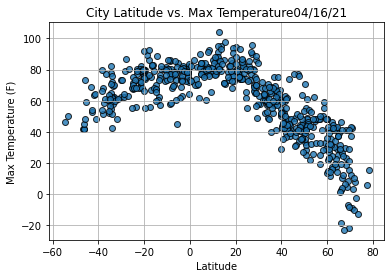

In [11]:
#Import the time module
import time
#Build the scatter plot for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha =0.8, label='Cities')
#Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#SHow plot
plt.show()

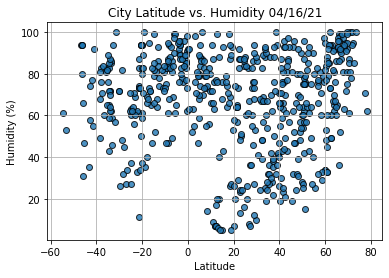

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

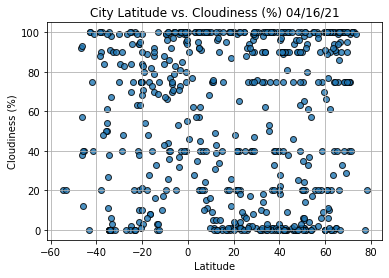

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

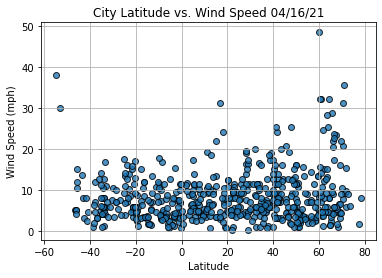

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

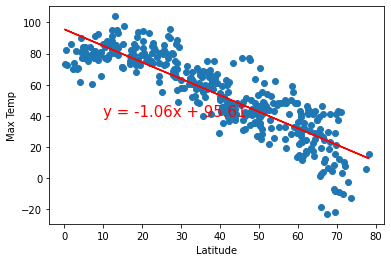

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

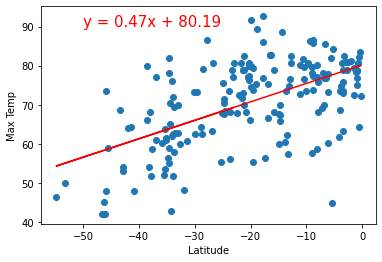

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

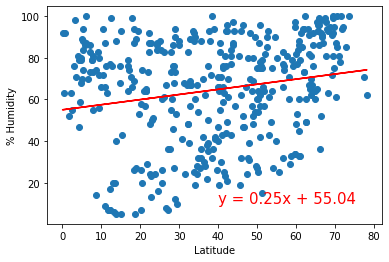

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

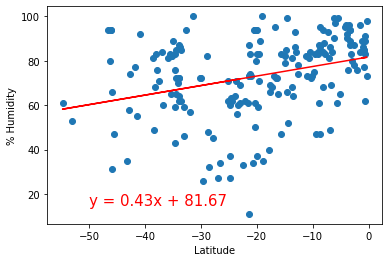

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

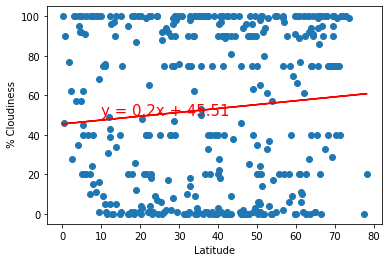

In [21]:
#Linear regression Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
#Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Cloudiness", " % Cloudiness", (10,50))

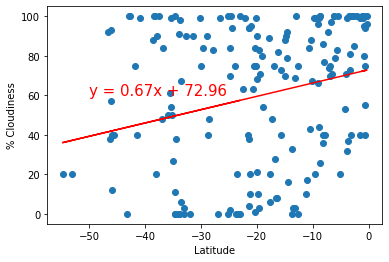

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

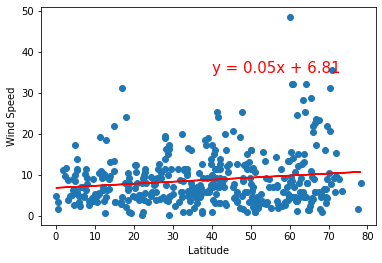

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

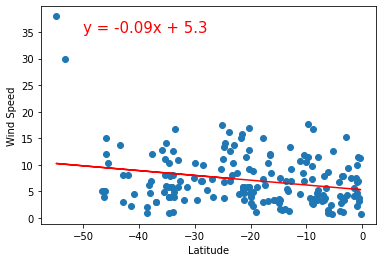

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))